In [132]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

In [149]:
import sys
import types
import pandas as pd
from ibm_botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_6e66e2db78b04f06a0fb0a77e04e36f5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='c-XvXnUYEDK6D9_FLsF0UsEKMJhaXv3NhZHxOFQrglki',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_6e66e2db78b04f06a0fb0a77e04e36f5.get_object(Bucket='prova-donotdelete-pr-htwa8abspyrjpu',Key='ex1data1.csv')['Body']

if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()
X=df_data_1.values[:,0]
y=df_data_1.values[:,1]

df_data_1

,X,y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
5,8.3829,11.88600
6,7.4764,4.34830
7,8.5781,12.00000
8,6.4862,6.59870
9,5.0546,3.81660


Plotting Data ...


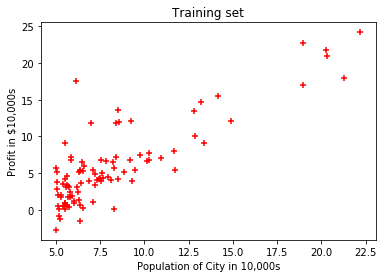

In [150]:
from matplotlib.pyplot import subplots, show
print('Plotting Data ...')

fig, ax = subplots()
ax.scatter(X,y, facecolor='red',marker='+')
ax.set_title("Training set")
ax.set_xlabel("Population of City in 10,000s")
ax.set_ylabel("Profit in $10,000s")
show()

In [151]:
lunghezza=len(X)
z = np.ones([lunghezza,1])

X=np.column_stack((z, X))

theta = np.zeros([2])# initialize fitting parameters

# Some gradient descent settings
iterations = 1500
alpha = 0.01

In [152]:
def computeCost(x, y, theta):
    m = len(y);
    J = 0;

    Jtmp=sum((np.dot(X,theta)-y)**2)

    J = 1 / (2 * m) * Jtmp

    return J
computeCost(X, y, theta)

32.072733877455654

In [153]:
m = len(y); 

num_iters=iterations
theta1 = np.zeros([2])
J_history = np.zeros(num_iters)

for iter in range(num_iters):
    
    Gtmp=np.dot(X,theta1)-y

    a1=theta1[0] - (alpha / m )* (np.dot(np.transpose(Gtmp),X[:,0]))
    b1=theta1[1] - (alpha / m )* (np.dot(np.transpose(Gtmp),X[:,1]))
    theta1[0] = a1
    theta1[1] = b1
    
    J_history[iter] = computeCost(X, y, theta1)

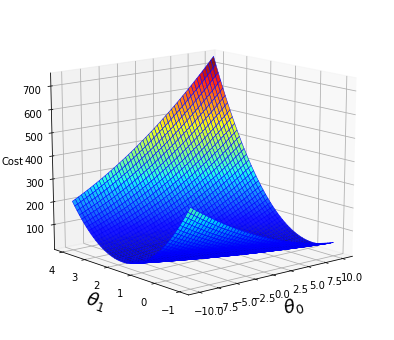

In [155]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

theta0_vals = np.linspace(-10, 10, 50)
theta1_vals = np.linspace(-1, 4, 50)
x_axe, y_axe = np.meshgrid(theta0_vals, theta1_vals, indexing='xy')

J_vals = np.zeros((theta0_vals.size,theta1_vals.size))

for (i,j),v in np.ndenumerate(J_vals):
    t = [theta0_vals[j], theta1_vals[i]]
    J_vals[i,j] = computeCost(X,y, t)

fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(1,2,2, projection='3d')

# Plot
ax.plot_surface(x_axe, y_axe, J_vals, rstride=1, cstride=1, alpha=0.9, cmap=plt.cm.jet, linewidth=0.5, edgecolors='b' )
ax.set_zlabel('Cost')
ax.set_zlim(J_vals.min(),J_vals.max())
ax.view_init(elev=15, azim=230)


for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=18)
    ax.set_ylabel(r'$\theta_1$', fontsize=18)